In [28]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

In [59]:
def load_top_fpr(predictions_file,proteins_only=True,fpr=0.05):
    df_predictions = pd.read_csv(predictions_file, sep='\t')
    fpr, tpr, thresholds = roc_curve(df_predictions['true_label'], df_predictions['predicted_score'])
    threshold = thresholds[fpr <= 0.05][-1]
    df_predictions = df_predictions[df_predictions['predicted_score'] >= threshold]
    if proteins_only:
        return set(df_predictions['protein'].values.tolist())
    return df_predictions
def venn_diagram(sets_dict, title="Venn Diagram", equal_size=False):
    """
    Create a Venn diagram showing intersection sizes.
    
    Parameters:
    sets_dict: dictionary where keys are set names and values are sets of elements
    title: title for the diagram
    equal_size: if True, all circles will be the same size regardless of actual set sizes
    
    Example:
    sets = {
        'A': {1, 2, 3, 4, 5},
        'B': {3, 4, 5, 6, 7},
        'C': {5, 6, 7, 8, 9}  # optional third set
    }
    """
    
    set_names = list(sets_dict.keys())
    set_values = list(sets_dict.values())
    
    if len(set_names) == 2:
        # Two-set Venn diagram
        A, B = set_values[0], set_values[1]
        
        # Calculate intersection sizes
        only_A = len(A - B)
        only_B = len(B - A)
        both_AB = len(A & B)
        
        # Create the diagram
        fig, ax = plt.subplots(figsize=(5, 4))
        
        if equal_size:
            # Use normalized values (all 1) to make circles equal size
            venn = venn2(subsets=(1, 1, 1), set_labels=set_names, ax=ax)
        else:
            # Use actual sizes
            venn = venn2(subsets=(only_A, only_B, both_AB), 
                         set_labels=set_names, ax=ax)
        
        # Add size labels to each region
        if venn.get_label_by_id('10'):
            venn.get_label_by_id('10').set_text(str(only_A))
        if venn.get_label_by_id('01'):
            venn.get_label_by_id('01').set_text(str(only_B))
        if venn.get_label_by_id('11'):
            venn.get_label_by_id('11').set_text(str(both_AB))
            
    elif len(set_names) == 3:
        # Three-set Venn diagram
        A, B, C = set_values[0], set_values[1], set_values[2]
        
        # Calculate intersection sizes
        only_A = len(A - B - C)
        only_B = len(B - A - C)
        only_C = len(C - A - B)
        AB_only = len((A & B) - C)
        AC_only = len((A & C) - B)
        BC_only = len((B & C) - A)
        ABC_all = len(A & B & C)
        
        # Create the diagram
        fig, ax = plt.subplots(figsize=(10, 8))
        
        if equal_size:
            # Use normalized values (all 1) to make circles equal size
            venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=set_names, ax=ax)
        else:
            # Use actual sizes
            venn = venn3(subsets=(only_A, only_B, AB_only, only_C, AC_only, BC_only, ABC_all),
                         set_labels=set_names, ax=ax)
        
        # Add size labels to each region
        labels = {
            '100': only_A,    # A only
            '010': only_B,    # B only
            '001': only_C,    # C only
            '110': AB_only,   # A and B, not C
            '101': AC_only,   # A and C, not B
            '011': BC_only,   # B and C, not A
            '111': ABC_all    # A, B, and C
        }
        
        for region_id, size in labels.items():
            label = venn.get_label_by_id(region_id)
            if label:
                label.set_text(str(size))
    
    else:
        raise ValueError("Only 2 or 3 sets are supported")
    
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

In [18]:
df_inflammatome = pd.read_csv('../data/ranked_list_inflammatome.tsv', sep='\t').iloc[:2000,[5]]
df_inflammatome.columns = ['protein']
df_inflammatome['protein'] = '9606.' + df_inflammatome['protein']
inf_set = set(df_inflammatome['protein'].values)

In [16]:
ad_set = load_top_fpr('../results/test_results/atopic_dermatitis/atopic_dermatitis_test_prediction_results.tsv', proteins_only=True, fpr=0.05)
uc_set = load_top_fpr('../results/test_results/ulcerative_colitis/ulcerative_colitis_test_prediction_results.tsv', proteins_only=True, fpr=0.05)

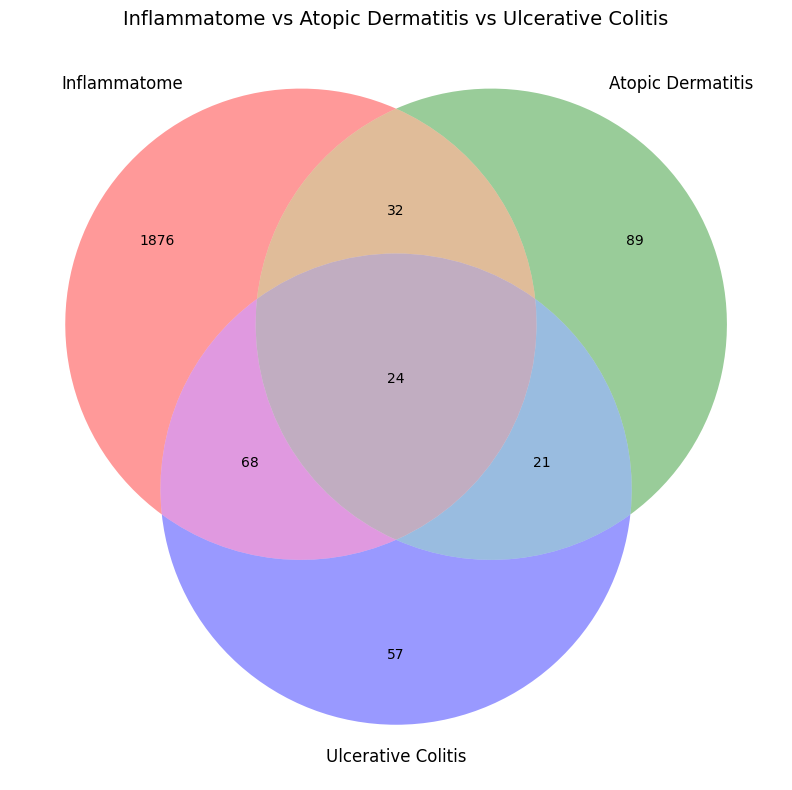

In [22]:
venn_diagram({
    'Inflammatome': inf_set,
    'Atopic Dermatitis': ad_set,
    'Ulcerative Colitis': uc_set
}, "Inflammatome vs Atopic Dermatitis vs Ulcerative Colitis", equal_size=True)

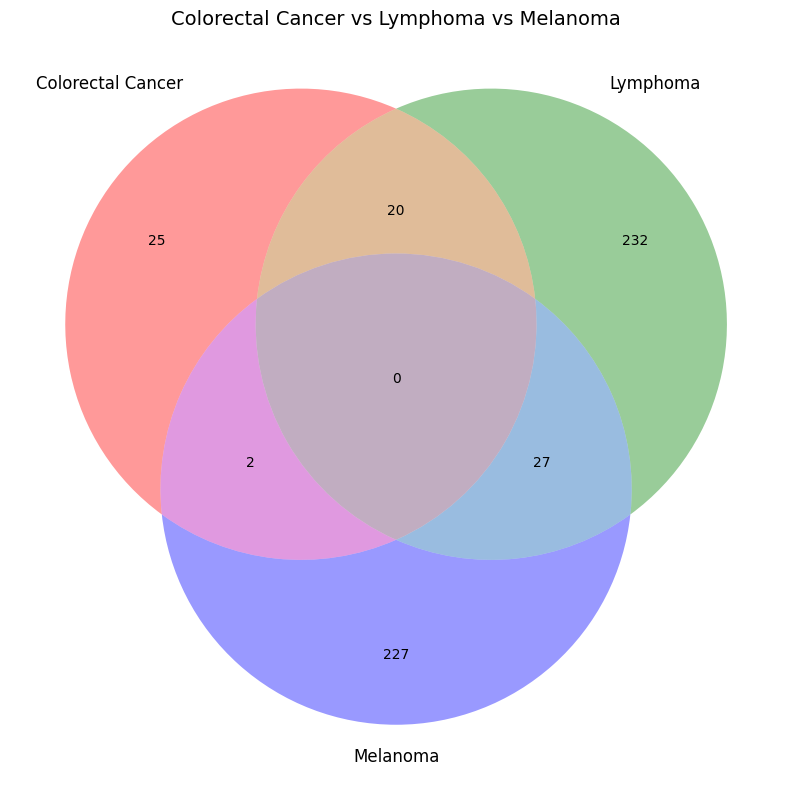

In [24]:
col_set = load_top_fpr('../results/test_results/COADREAD/COADREAD_test_prediction_results.tsv', proteins_only=True, fpr=0.05)
lym_set = load_top_fpr('../results/test_results/DLBCLNOS/DLBCLNOS_test_prediction_results.tsv', proteins_only=True, fpr=0.05)
mel_set = load_top_fpr('../results/test_results/MEL/MEL_test_prediction_results.tsv', proteins_only=True, fpr=0.05)

venn_diagram({
    'Colorectal Cancer': col_set,
    'Lymphoma': lym_set,
    'Melanoma': mel_set
}, "Colorectal Cancer vs Lymphoma vs Melanoma", equal_size=True)

In [33]:
df_oncokb = pd.read_csv('../data/cancerGeneList_oncokb.tsv', sep='\t')[['Hugo Symbol','Gene Aliases']]
df_oncokb

,Hugo Symbol,Gene Aliases
0,ABL1,"ABL, JTK7, c-ABL"
1,AKT1,"AKT, PKB, PRKBA, RAC, RAC-alpha"
2,ALK,CD246
3,AMER1,"FAM123B, FLJ39827, RP11-403E24.2, WTX"
4,APC,"DP2.5, PPP1R46"
...,...,...
1190,ZFP36L2,"ERF2, RNF162C, TIS11D"
1191,ZNF24,"KOX17, ZNF191, ZSCAN3, Zfp191"
1192,ZNF292,"KIAA0530, ZFP292, Zn-15, Zn-16, bA393I2.3"
1193,ZNF331,"RITA, ZNF361, ZNF463"


In [36]:
df_human_alias = pd.read_csv('../data/9606.protein.aliases.v12.0.txt.gz', sep='\t', compression='gzip')[['#string_protein_id','alias']].drop_duplicates()
df_human_alias

,#string_protein_id,alias
0,9606.ENSP00000000233,2B6H
2,9606.ENSP00000000233,381
6,9606.ENSP00000000233,A4D0Z3
7,9606.ENSP00000000233,AAA90927.1
8,9606.ENSP00000000233,AAC51299.1
...,...,...
3889201,9606.ENSP00000501317,hsa:64864
3889202,9606.ENSP00000501317,regulatory factor X domain containing 2
3889203,9606.ENSP00000501317,"regulatory factor X, 7"
3889204,9606.ENSP00000501317,regulatory factor X7


In [43]:
df_human_alias = pd.read_csv('../data/9606.protein.aliases.v12.0.txt.gz', sep='\t', compression='gzip')

In [49]:
df_human_alias = df_human_alias[df_human_alias['source'].str.contains('HUGO')].iloc[:,:2].drop_duplicates()
df_human_alias

,#string_protein_id,alias
21,9606.ENSP00000000233,ARF5
217,9606.ENSP00000000412,M6PR
395,9606.ENSP00000001008,FKBP4
525,9606.ENSP00000001146,CYP26B1
757,9606.ENSP00000002125,NDUFAF7
...,...,...
3888488,9606.ENSP00000501254,ALDH3B2
3888655,9606.ENSP00000501259,FAM163B
3888822,9606.ENSP00000501265,NWD1
3888967,9606.ENSP00000501277,LDB1


In [50]:
df_oncokb_match = df_oncokb.merge(df_human_alias, left_on='Hugo Symbol', right_on='alias', how='left').drop_duplicates().dropna(subset=['#string_protein_id'])
df_oncokb_match.head()

,Hugo Symbol,Gene Aliases,#string_protein_id,alias
0,ABL1,"ABL, JTK7, c-ABL",9606.ENSP00000361423,ABL1
1,AKT1,"AKT, PKB, PRKBA, RAC, RAC-alpha",9606.ENSP00000451828,AKT1
2,ALK,CD246,9606.ENSP00000373700,ALK
3,AMER1,"FAM123B, FLJ39827, RP11-403E24.2, WTX",9606.ENSP00000364003,AMER1
4,APC,"DP2.5, PPP1R46",9606.ENSP00000257430,APC


In [52]:
df_oncokb_match

,Hugo Symbol,Gene Aliases,#string_protein_id,alias
0,ABL1,"ABL, JTK7, c-ABL",9606.ENSP00000361423,ABL1
1,AKT1,"AKT, PKB, PRKBA, RAC, RAC-alpha",9606.ENSP00000451828,AKT1
2,ALK,CD246,9606.ENSP00000373700,ALK
3,AMER1,"FAM123B, FLJ39827, RP11-403E24.2, WTX",9606.ENSP00000364003,AMER1
4,APC,"DP2.5, PPP1R46",9606.ENSP00000257430,APC
...,...,...,...,...
1191,ZFP36L2,"ERF2, RNF162C, TIS11D",9606.ENSP00000282388,ZFP36L2
1192,ZNF24,"KOX17, ZNF191, ZSCAN3, Zfp191",9606.ENSP00000382015,ZNF24
1193,ZNF292,"KIAA0530, ZFP292, Zn-15, Zn-16, bA393I2.3",9606.ENSP00000358590,ZNF292
1194,ZNF331,"RITA, ZNF361, ZNF463",9606.ENSP00000253144,ZNF331


In [ ]:
# symbol that have duplicate matches
df_oncokb_match[df_oncokb_match.duplicated(subset=['Hugo Symbol'], keep=False)].sort_values(by='Hugo Symbol')
## after look-up, we know that ATXN7 is 9606.ENSP00000295900 in STRING

,Hugo Symbol,Gene Aliases,#string_protein_id,alias
643,ATXN7,"ADCAII, OPCA3, SCA7, SGF73",9606.ENSP00000295900,ATXN7
644,ATXN7,"ADCAII, OPCA3, SCA7, SGF73",9606.ENSP00000439585,ATXN7


In [53]:
oncokb_set = set(df_oncokb_match['#string_protein_id'].values)
# remove 9606.ENSP00000439585
oncokb_set.remove('9606.ENSP00000439585')

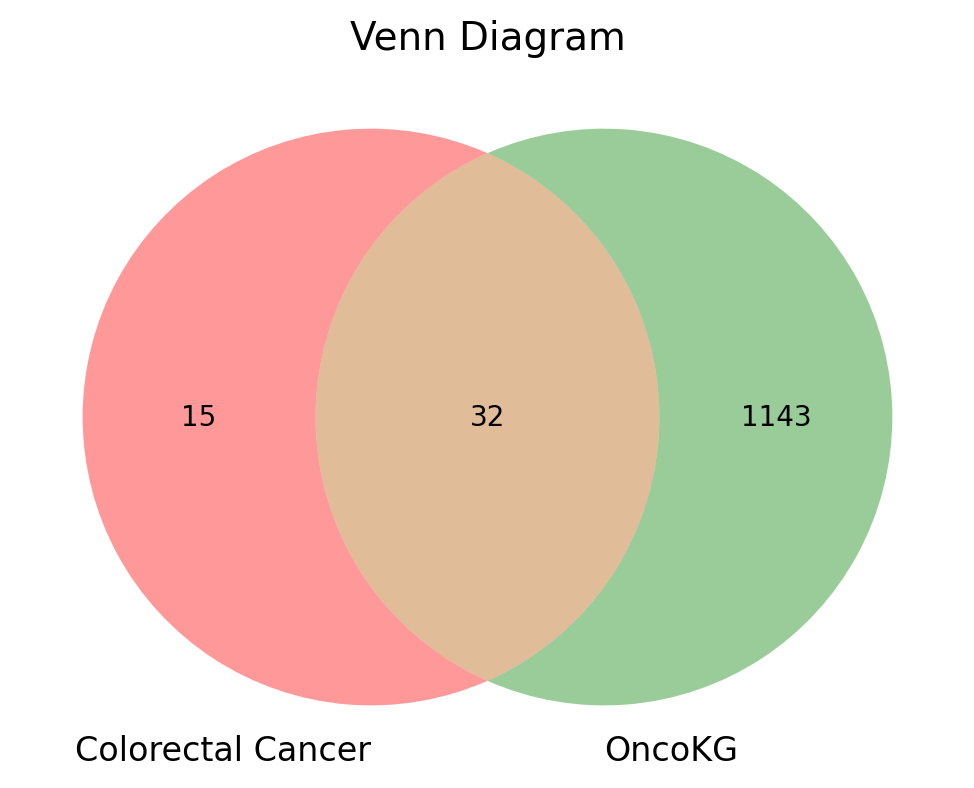

In [61]:
sets = {
    'Colorectal Cancer': col_set,
    'OncoKG': oncokb_set,
}
    
venn_diagram(sets,equal_size=True)

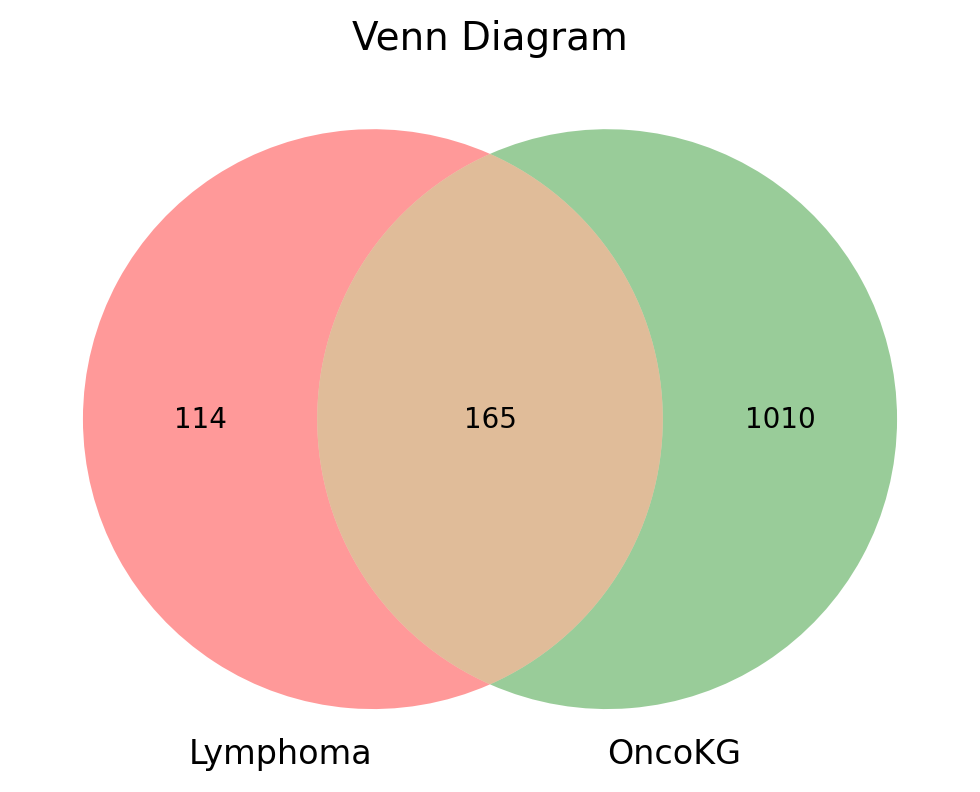

In [62]:
sets = {
    'Lymphoma': lym_set,
    'OncoKG': oncokb_set,
}
    
venn_diagram(sets,equal_size=True)

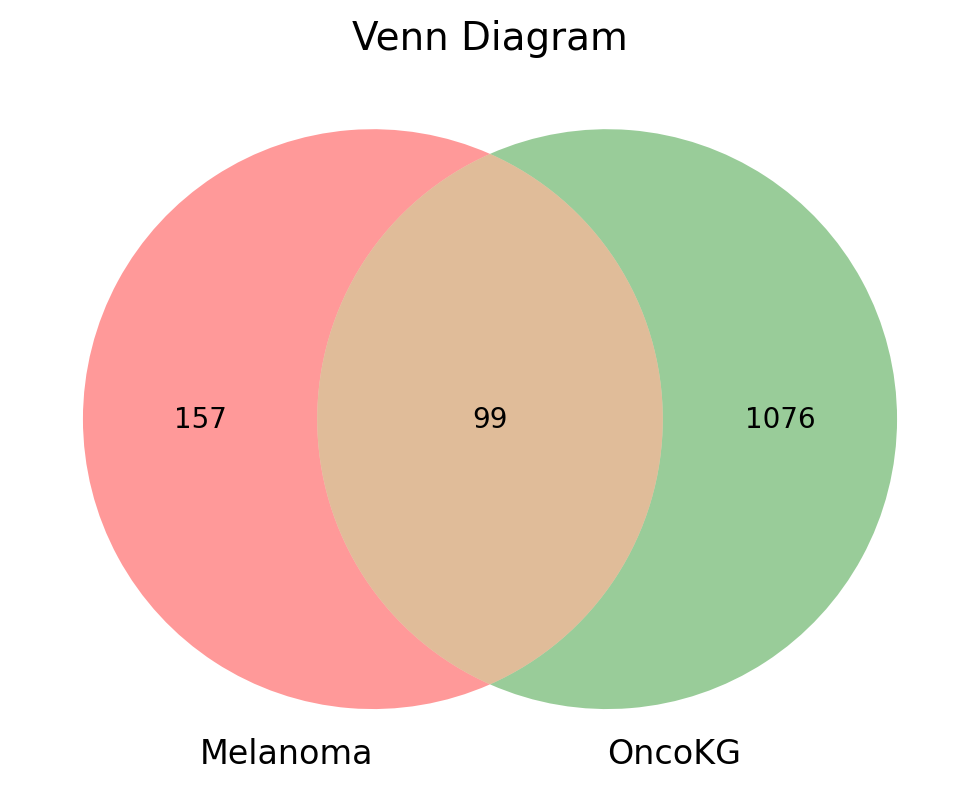

In [65]:
venn_diagram({
    'Melanoma': mel_set,
    'OncoKG': oncokb_set,
},equal_size=True)

In [70]:
df_aneurysm_test_prediction = pd.read_csv('../results/test_results/aortic_aneurysm/aortic_aneurysm_test_prediction_results.tsv', sep='\t')
df_aneurysm_whole_prediction = pd.read_csv('../results/test_results/aortic_aneurysm/aortic_aneurysm_whole_prediction_results.tsv', sep='\t')
df_aneurysm_test_prediction = df_aneurysm_test_prediction.merge(df_aneurysm_whole_prediction, on='protein',)
df_aneurysm_test_prediction['predicted_score'] = df_aneurysm_test_prediction['predicted_score_x'] 
df_aneurysm_test_prediction = df_aneurysm_test_prediction[['protein', 'predicted_score','true_label','category']]
fpr, tpr, thresholds = roc_curve(df_aneurysm_test_prediction['true_label'], df_aneurysm_test_prediction['predicted_score'])
threshold = thresholds[fpr <= 0.05][-1]
df_aneurysm_test_prediction = df_aneurysm_test_prediction[df_aneurysm_test_prediction['predicted_score'] >= threshold]
df_aneurysm_test_prediction

,protein,predicted_score,true_label,category
0,9606.ENSP00000052754,0.220623,1,text_mining
4,9606.ENSP00000218388,0.214339,1,both
6,9606.ENSP00000219070,0.096283,1,text_mining
8,9606.ENSP00000220809,0.050449,1,text_mining
10,9606.ENSP00000223095,0.098026,1,text_mining
16,9606.ENSP00000225831,0.052592,1,text_mining
18,9606.ENSP00000225964,0.058298,1,text_mining
24,9606.ENSP00000236826,0.076448,1,text_mining
26,9606.ENSP00000238682,0.128465,1,text_mining
28,9606.ENSP00000250092,0.121318,1,text_mining


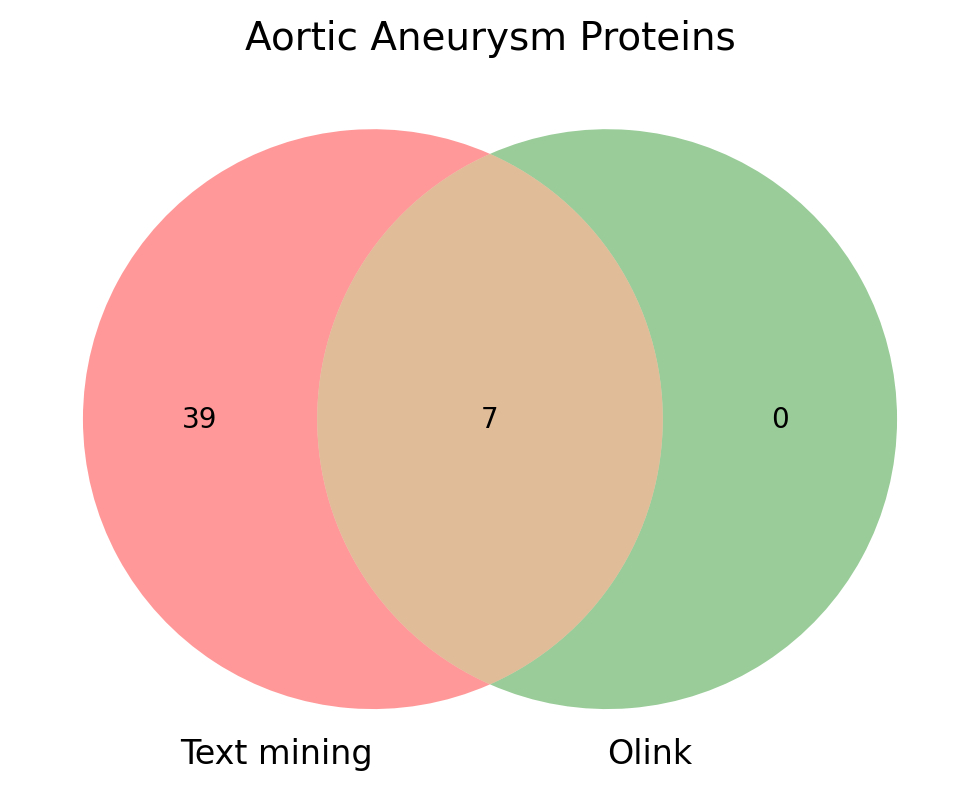

In [74]:
aneurysm_sets = {
    'Text mining': set(),
    'Olink': set(),
    'New': set()
}

for idx, row in df_aneurysm_test_prediction.iterrows():
    if row['category'] == 'text_mining':
        aneurysm_sets['Text mining'].add(row['protein'])
    elif row['category'] == 'training':
        aneurysm_sets['Olink'].add(row['protein'])
    elif row['category'] == 'novel':
        aneurysm_sets['New'].add(row['protein'])
    elif row['category'] == 'both':
        aneurysm_sets['Text mining'].add(row['protein'])
        aneurysm_sets['Olink'].add(row['protein'])
    else:
        raise ValueError(f"Unknown category: {row['category']}")

# remove the key 'New'. 
aneurysm_sets.pop('New', None)


venn_diagram(aneurysm_sets, title="Aortic Aneurysm Proteins", equal_size=True)